<a href="https://colab.research.google.com/github/seifah1234/Project/blob/main/Mall_Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [58]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv')
print("Data Head: ")
display(df.head())
print("\nData Info:")
display(df.info())
print("\nData Describe:")
display(df.describe())

Data Head: 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None


Data Describe:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
print("Data Null values: \n", df.isna().sum())

Data Null values: 
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [60]:
print("Data Duplicates: \n", df.duplicated().sum())

Data Duplicates: 
 0


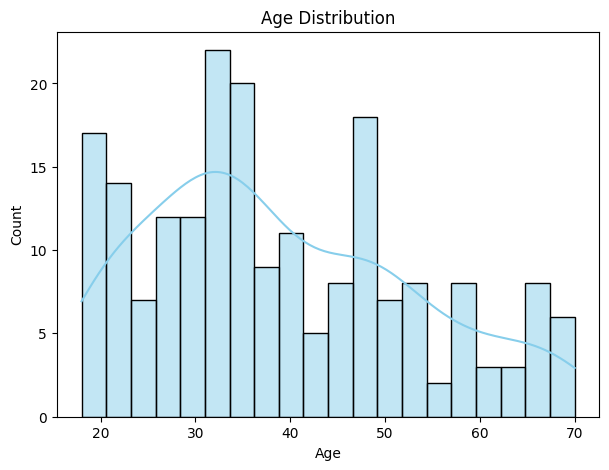

In [61]:
plt.figure(figsize=(7,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

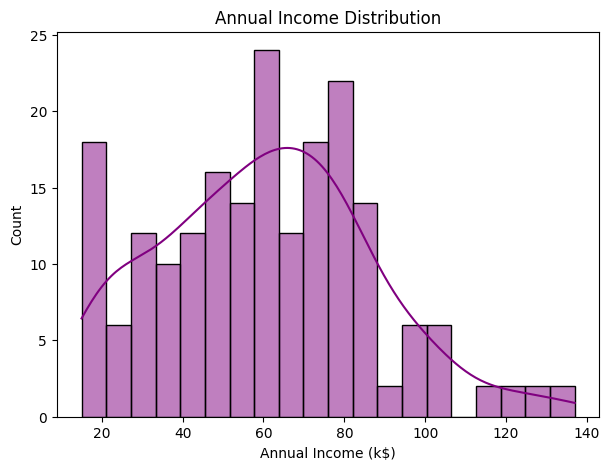

In [62]:
plt.figure(figsize=(7,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="purple")
plt.title("Annual Income Distribution")
plt.show()

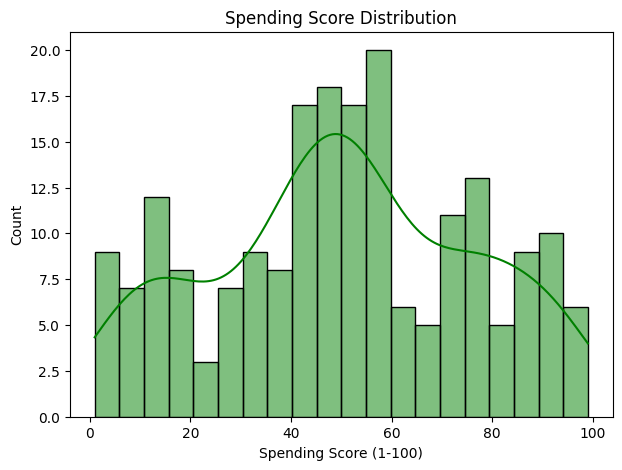

In [63]:
plt.figure(figsize=(7,5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="green")
plt.title("Spending Score Distribution")
plt.show()

/tmp/ipython-input-526149357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df, palette="Set2")


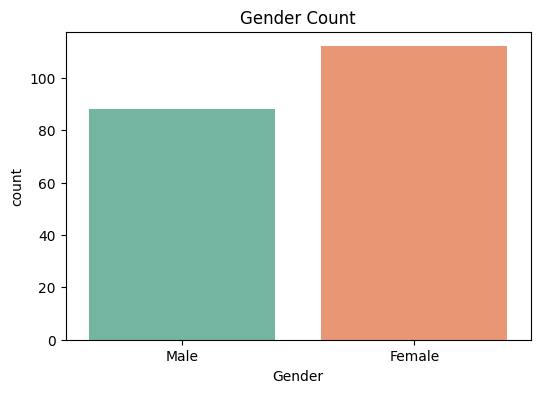

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender",data=df, palette="Set2")
plt.title("Gender Count")
plt.show()

In [65]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [66]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [67]:
X = df[:180]

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pred = pca.fit_transform(df[180:])

In [69]:
model = KMeans(n_clusters=3 ,random_state=42)
clusters = model.fit_predict(X_pca)

In [73]:
X_test = model.predict(X_pred)

array([2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0],
      dtype=int32)

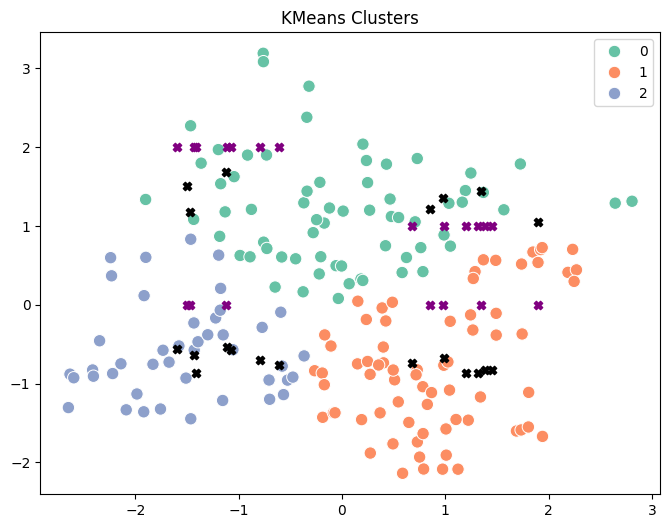

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=80)
plt.scatter(x=X_pred[:,0], y=X_pred[:,1], marker="X", color="black")
plt.scatter(x=X_pred[:,0], y=X_test, marker="X", color="purple")
plt.title("KMeans Clusters")
plt.legend()
plt.show()